In [1]:
import pandas as pd
import numpy as np

In [2]:
ab = pd.read_csv('post_abtest_data.csv',na_values='?')
ab.head()

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
0,867689,2020-05-28,1,Control,1,1,no surge,Android,0.0,1.0,Control
1,867689,2020-05-29,1,Control,1,0,surge,iOS,NaN,NaN,Control
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
3,752172,2020-05-29,1,Control,1,1,surge,Android,0.0,1.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control


# Гипотеза:
При уточнении, уверен ли юзер в отмене заказа не из центра, добавить эмодзи котика, просящего не отменять. 

*Ожидаем:* ниже отмены по заказам НЕ из центра

H0 - показатель user_cancelled в двух группах не отличается. H1 - показатель user_cancelled в тестовой группе выше 

Уровень значимости 0,05. 

In [3]:
#фильтруем выборку
no_city_center = ab.loc[(ab['city_center_order'] == 0)]
no_city_center

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
101478,403957,2020-05-31,1,Test,1,1,surge,Android,1.0,0.0,Test
101479,777242,2020-05-30,1,Test,1,1,no surge,iOS,0.0,0.0,Test
101485,155474,2020-05-25,1,Test,1,1,no surge,Android,0.0,0.0,Test
101486,946650,2020-05-26,1,Test,1,1,surge,Android,0.0,0.0,Test


In [12]:
#считаем показатели отмены поюзерно
pd.options.mode.chained_assignment = None
no_city_center.user_cancelled = no_city_center.groupby('user_id', as_index=False)['user_cancelled'].sum()['user_cancelled']
no_city_center

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
101478,403957,2020-05-31,1,Test,1,1,surge,Android,NaN,0.0,Test
101479,777242,2020-05-30,1,Test,1,1,no surge,iOS,NaN,0.0,Test
101485,155474,2020-05-25,1,Test,1,1,no surge,Android,NaN,0.0,Test
101486,946650,2020-05-26,1,Test,1,1,surge,Android,NaN,0.0,Test


In [14]:
#удаляем значения, где отмена не рассчитана
no_city_center = no_city_center.dropna()
no_city_center

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
19559,578870,2020-05-29,1,Control,1,1,no surge,iOS,0.0,0.0,Control
19560,354279,2020-05-27,1,Control,1,1,no surge,iOS,0.0,0.0,Control
19563,354279,2020-05-25,1,Control,1,1,no surge,Android,0.0,0.0,Control
19564,819814,2020-05-29,1,Test,1,1,no surge,iOS,0.0,0.0,Test


In [15]:
#собираем контрольную группу
no_city_center_control = no_city_center.loc[(no_city_center['group'] == 'Control')]
no_city_center_control

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
19553,578870,2020-05-28,1,Control,1,1,surge,Android,0.0,0.0,Control
19559,578870,2020-05-29,1,Control,1,1,no surge,iOS,0.0,0.0,Control
19560,354279,2020-05-27,1,Control,1,1,no surge,iOS,0.0,0.0,Control
19563,354279,2020-05-25,1,Control,1,1,no surge,Android,0.0,0.0,Control


In [16]:
#собираем тестовую группу
no_city_center_test = no_city_center.loc[(no_city_center['group'] == 'Test')]
no_city_center_test

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
17,139455,2020-05-31,1,Test,1,1,surge,Android,0.0,0.0,Test
21,139455,2020-05-30,1,Test,1,1,no surge,Android,0.0,0.0,Test
31,682337,2020-05-25,1,Test,1,1,no surge,iOS,0.0,0.0,Test
34,682337,2020-05-27,1,Test,1,1,no surge,iOS,0.0,0.0,Test
35,682337,2020-05-31,1,Test,1,1,no surge,Android,0.0,0.0,Test
...,...,...,...,...,...,...,...,...,...,...,...
19548,426688,2020-05-31,1,Test,1,1,no surge,Android,0.0,0.0,Test
19549,426688,2020-05-29,1,Test,1,1,no surge,Android,0.0,0.0,Test
19550,426688,2020-05-30,1,Test,1,1,no surge,iOS,0.0,0.0,Test
19552,426688,2020-05-28,1,Test,1,1,surge,iOS,0.0,0.0,Test


In [19]:
no_city_center_control.date.max()

'2020-05-31'

In [20]:
no_city_center_control.date.min()

'2020-05-25'

In [21]:
no_city_center_test.date.max()

'2020-05-31'

In [22]:
no_city_center_test.date.min()

'2020-05-25'

In [25]:
#сгруппируем данные по дате
no_city_center_test_date = no_city_center_test.groupby('date').agg({'user_id':'nunique', 'user_cancelled':'sum'}).reset_index()
no_city_center_test_date

,date,user_id,user_cancelled
0,2020-05-25,506,32.0
1,2020-05-26,495,13.0
2,2020-05-27,521,26.0
3,2020-05-28,466,16.0
4,2020-05-29,492,26.0
5,2020-05-30,498,25.0
6,2020-05-31,501,25.0


In [26]:
no_city_center_control_date = no_city_center_control.groupby('date').agg({'user_id':'nunique', 'user_cancelled':'sum'}).reset_index()
no_city_center_control_date

,date,user_id,user_cancelled
0,2020-05-25,459,37.0
1,2020-05-26,421,24.0
2,2020-05-27,440,28.0
3,2020-05-28,463,33.0
4,2020-05-29,469,18.0
5,2020-05-30,497,29.0
6,2020-05-31,445,19.0


In [40]:
#посчитаем показатель отмен к количеству юзеров по дате
no_city_center_control_date['u_c/user_id'] = np.where(no_city_center_control_date['user_id'] < 1, no_city_center_control_date['user_id'], no_city_center_control_date['user_cancelled']/no_city_center_control_date['user_id'])
no_city_center_control_date

,date,user_id,user_cancelled,u_c/user_id
0,2020-05-25,459,37.0,0.080610
1,2020-05-26,421,24.0,0.057007
2,2020-05-27,440,28.0,0.063636
3,2020-05-28,463,33.0,0.071274
4,2020-05-29,469,18.0,0.038380
5,2020-05-30,497,29.0,0.058350
6,2020-05-31,445,19.0,0.042697


In [41]:
no_city_center_test_date['u_c/user_id'] = np.where(no_city_center_test_date['user_id'] < 1, no_city_center_test_date['user_id'], no_city_center_test_date['user_cancelled']/no_city_center_test_date['user_id'])
no_city_center_test_date

,date,user_id,user_cancelled,u_c/user_id
0,2020-05-25,506,32.0,0.063241
1,2020-05-26,495,13.0,0.026263
2,2020-05-27,521,26.0,0.049904
3,2020-05-28,466,16.0,0.034335
4,2020-05-29,492,26.0,0.052846
5,2020-05-30,498,25.0,0.050201
6,2020-05-31,501,25.0,0.049900


In [42]:
import scipy.stats as stats
#попробуем сравнить группы по показателю отмены поездки
t, p_value = stats.ttest_ind(no_city_center_control_date['u_c/user_id'], no_city_center_test_date['u_c/user_id']) #Критерий Стьюдента (t-test)
t, p_value

(1.6645333412898387, 0.12187855403198598)

In [43]:
stats.ttest_ind(no_city_center_control_date['u_c/user_id'], no_city_center_test_date['u_c/user_id'], equal_var = False)

Ttest_indResult(statistic=1.6645333412898382, pvalue=0.12276859230187426)

In [44]:
alpha = 0.05
if p_value < alpha:
    print('p-value меньше уровня значимости -- значит гипотезу о том, что выборки различаются, следует отвергнуть')
else: 
    print('p-value больше уровня значимости -- значит гипотезу о том, что выборки различаются, следует принять') 

p-value больше уровня значимости -- значит гипотезу о том, что выборки различаются, следует принять


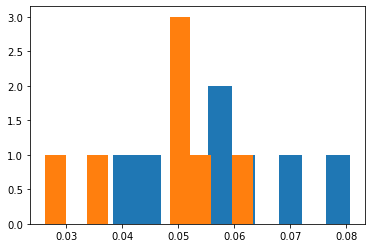

In [45]:
import matplotlib.pyplot as plt
plt.hist(no_city_center_control_date['u_c/user_id'], bins=10); 
plt.hist(no_city_center_test_date['u_c/user_id'], bins=10);

In [30]:
#посчитаем p-value по дням
def p_value_data(control, test):  
    t, p_value = stats.ttest_ind(control, test) 
    return p_value

In [64]:
#объединим выборки для удобства
no_city_center_all_date = pd.DataFrame ()
no_city_center_all_date = no_city_center_control_date
no_city_center_all_date

,date,user_id,user_cancelled,u_c/user_id
0,2020-05-25,459,37.0,0.080610
1,2020-05-26,421,24.0,0.057007
2,2020-05-27,440,28.0,0.063636
3,2020-05-28,463,33.0,0.071274
4,2020-05-29,469,18.0,0.038380
5,2020-05-30,497,29.0,0.058350
6,2020-05-31,445,19.0,0.042697


In [65]:
no_city_center_all_date = no_city_center_all_date.drop('user_id', 1)
no_city_center_all_date = no_city_center_all_date.drop('user_cancelled', 1)
no_city_center_all_date

,date,u_c/user_id
0,2020-05-25,0.080610
1,2020-05-26,0.057007
2,2020-05-27,0.063636
3,2020-05-28,0.071274
4,2020-05-29,0.038380
5,2020-05-30,0.058350
6,2020-05-31,0.042697


In [67]:
no_city_center_all_date ['u_c/user_id-test'] = no_city_center_test_date['u_c/user_id']
no_city_center_all_date

,date,u_c/user_id,u_c/user_id-test
0,2020-05-25,0.080610,0.063241
1,2020-05-26,0.057007,0.026263
2,2020-05-27,0.063636,0.049904
3,2020-05-28,0.071274,0.034335
4,2020-05-29,0.038380,0.052846
5,2020-05-30,0.058350,0.050201
6,2020-05-31,0.042697,0.049900


In [70]:
result = no_city_center_all_date.apply(lambda row: p_value_data(no_city_center_all_date ['u_c/user_id'],no_city_center_all_date ['u_c/user_id-test']), axis=1)
print(result)

0    0.121879
1    0.121879
2    0.121879
3    0.121879
4    0.121879
5    0.121879
6    0.121879
dtype: float64


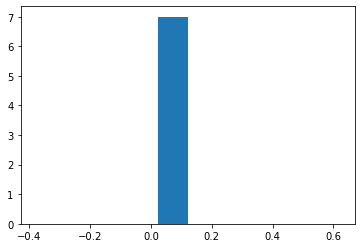

In [76]:
plt.hist(result, bins=10); 